In [19]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [20]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [21]:
NUM_CLASSES = 5

# Dataset reading

In [22]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [23]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [26]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout_4 (Dropout)                  │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Model checkpoint callback
model_save_path = model_save_path + ".keras"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [28]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [29]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 19s 683ms/step - accuracy: 0.0234 - loss: 1.9244
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0580 - loss: 1.8305 - val_accuracy: 0.2818 - val_loss: 1.5662
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1719 - loss: 1.6352
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2064 - loss: 1.6189 - val_accuracy: 0.3410 - val_loss: 1.4875
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2734 - loss: 1.5453
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3138 - loss: 1.5267 - val_accuracy: 0.3320 - val_loss: 1.4107
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3125 - loss: 1.4761
Epoch 4: saving model to model/keypoint_classifier/keypoint

In [30]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9721 - loss: 0.2009


In [31]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [32]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[7.5534952e-01 2.4364576e-01 7.7628624e-04 2.2113178e-04 7.4063123e-06]
0


# Confusion matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step


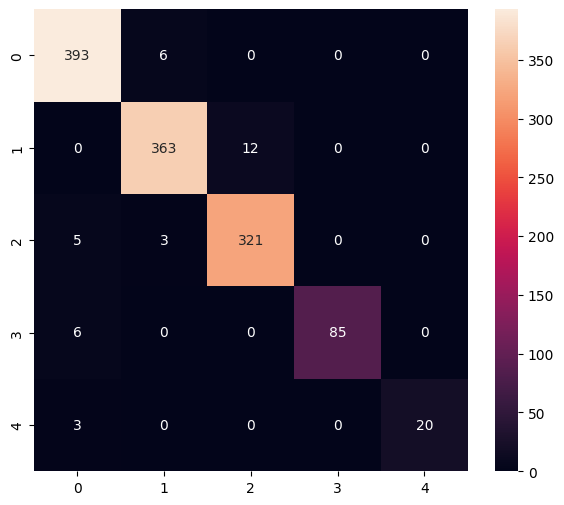

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       399
           1       0.98      0.97      0.97       375
           2       0.96      0.98      0.97       329
           3       1.00      0.93      0.97        91
           4       1.00      0.87      0.93        23

    accuracy                           0.97      1217
   macro avg       0.98      0.95      0.96      1217
weighted avg       0.97      0.97      0.97      1217



In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [34]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [35]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rjmun\AppData\Local\Temp\tmpz8q1cija\assets


INFO:tensorflow:Assets written to: C:\Users\rjmun\AppData\Local\Temp\tmpz8q1cija\assets


Saved artifact at 'C:\Users\rjmun\AppData\Local\Temp\tmpz8q1cija'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1831710762256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1831710762064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1831711103632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1831711109584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1831711106320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1831711109968: TensorSpec(shape=(), dtype=tf.resource, name=None)


6584

# Inference test

In [36]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [37]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [39]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [40]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.5534940e-01 2.4364583e-01 7.7628682e-04 2.2113194e-04 7.4063255e-06]
0
